# COVID-19 France Cases Data Vizualisation Notebook
------------------

### Importing Libraries

In [1]:
import pandas as pd #Dataframe manipulation library
import numpy as np #Library to handle data in a vectorized manner
import matplotlib.pyplot as plt #Matplotlib and associated plotting modules
import matplotlib.colors as mcolors
import matplotlib as mpl
from matplotlib import style
import math #Math functions
import requests #library to handle requests
import os
import random
import time
import datetime
import warnings

warnings.filterwarnings("ignore")
print('Libraries imported.')

Libraries imported.


### Importing Dataset

In [2]:
###Import the data from CSSE at Johns Hopkins University (https://systems.jhu.edu/)
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,41814,41935,41975,42033,42092,42297,42463,42609,42795,42969
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,22300,22721,23210,23705,24206,24731,25294,25801,26211,26701
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,59527,60169,60800,61381,62051,62693,63446,64257,65108,65975
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5045,5135,5135,5319,5383,5437,5477,5567,5616,5725
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,11813,12102,12223,12335,12433,12680,12816,12953,13053,13228


In [4]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34362,34440,34440,34446,34458,34721,34954,34967,35024,35036
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11578,11696,11861,12002,12092,12203,12353,12493,12574,12667
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,41001,41244,41510,41783,42037,42325,42626,42980,42980,43779
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,3734,3858,3858,4043,4248,4332,4405,4488,4585,4675
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,5266,5350,5626,5647,5899,5927,6036,6125,6250,6326


In [5]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1548,1554,1554,1556,1558,1574,1577,1581,1591,1595
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,536,543,549,557,559,571,579,590,598,605
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1999,2011,2024,2036,2048,2062,2077,2093,2111,2124
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,75,75
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,296,299,300,303,307,308,308,312,315,317


#### Check the shape of the dataframes

In [6]:
confirmed_df.shape

(269, 301)

In [7]:
recoveries_df.shape

(256, 301)

In [8]:
deaths_df.shape

(269, 301)

### Delete the useless columns

In [9]:
confirmed_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
confirmed_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,41814,41935,41975,42033,42092,42297,42463,42609,42795,42969
1,Albania,0,0,0,0,0,0,0,0,0,...,22300,22721,23210,23705,24206,24731,25294,25801,26211,26701
2,Algeria,0,0,0,0,0,0,0,0,0,...,59527,60169,60800,61381,62051,62693,63446,64257,65108,65975
3,Andorra,0,0,0,0,0,0,0,0,0,...,5045,5135,5135,5319,5383,5437,5477,5567,5616,5725
4,Angola,0,0,0,0,0,0,0,0,0,...,11813,12102,12223,12335,12433,12680,12816,12953,13053,13228


In [10]:
recoveries_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
recoveries_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,34362,34440,34440,34446,34458,34721,34954,34967,35024,35036
1,Albania,0,0,0,0,0,0,0,0,0,...,11578,11696,11861,12002,12092,12203,12353,12493,12574,12667
2,Algeria,0,0,0,0,0,0,0,0,0,...,41001,41244,41510,41783,42037,42325,42626,42980,42980,43779
3,Andorra,0,0,0,0,0,0,0,0,0,...,3734,3858,3858,4043,4248,4332,4405,4488,4585,4675
4,Angola,0,0,0,0,0,0,0,0,0,...,5266,5350,5626,5647,5899,5927,6036,6125,6250,6326


In [11]:
deaths_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
deaths_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1548,1554,1554,1556,1558,1574,1577,1581,1591,1595
1,Albania,0,0,0,0,0,0,0,0,0,...,536,543,549,557,559,571,579,590,598,605
2,Algeria,0,0,0,0,0,0,0,0,0,...,1999,2011,2024,2036,2048,2062,2077,2093,2111,2124
3,Andorra,0,0,0,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,75,75
4,Angola,0,0,0,0,0,0,0,0,0,...,296,299,300,303,307,308,308,312,315,317


### Aggregate rows by Country

In [12]:
confirmed_df_aggregated = confirmed_df.groupby("Country/Region").sum()
confirmed_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,41814,41935,41975,42033,42092,42297,42463,42609,42795,42969
Albania,0,0,0,0,0,0,0,0,0,0,...,22300,22721,23210,23705,24206,24731,25294,25801,26211,26701
Algeria,0,0,0,0,0,0,0,0,0,0,...,59527,60169,60800,61381,62051,62693,63446,64257,65108,65975
Andorra,0,0,0,0,0,0,0,0,0,0,...,5045,5135,5135,5319,5383,5437,5477,5567,5616,5725
Angola,0,0,0,0,0,0,0,0,0,0,...,11813,12102,12223,12335,12433,12680,12816,12953,13053,13228


In [13]:
recoveries_df_aggregated = recoveries_df.groupby("Country/Region").sum()
recoveries_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,34362,34440,34440,34446,34458,34721,34954,34967,35024,35036
Albania,0,0,0,0,0,0,0,0,0,0,...,11578,11696,11861,12002,12092,12203,12353,12493,12574,12667
Algeria,0,0,0,0,0,0,0,0,0,0,...,41001,41244,41510,41783,42037,42325,42626,42980,42980,43779
Andorra,0,0,0,0,0,0,0,0,0,0,...,3734,3858,3858,4043,4248,4332,4405,4488,4585,4675
Angola,0,0,0,0,0,0,0,0,0,0,...,5266,5350,5626,5647,5899,5927,6036,6125,6250,6326


In [14]:
deaths_df_aggregated = deaths_df.groupby("Country/Region").sum()
deaths_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1548,1554,1554,1556,1558,1574,1577,1581,1591,1595
Albania,0,0,0,0,0,0,0,0,0,0,...,536,543,549,557,559,571,579,590,598,605
Algeria,0,0,0,0,0,0,0,0,0,0,...,1999,2011,2024,2036,2048,2062,2077,2093,2111,2124
Andorra,0,0,0,0,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,75,75
Angola,0,0,0,0,0,0,0,0,0,0,...,296,299,300,303,307,308,308,312,315,317


#### Check the shape of the new dataframes

In [15]:
confirmed_df_aggregated.shape

(191, 297)

In [16]:
recoveries_df_aggregated.shape

(191, 297)

In [17]:
deaths_df_aggregated.shape

(191, 297)

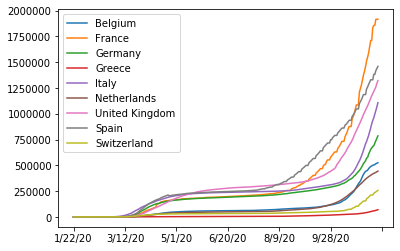

In [18]:
confirmed_df_aggregated.loc ["Belgium"].plot()
confirmed_df_aggregated.loc ["France"].plot()
confirmed_df_aggregated.loc ["Germany"].plot()
confirmed_df_aggregated.loc ["Greece"].plot()
confirmed_df_aggregated.loc ["Italy"].plot()
confirmed_df_aggregated.loc ["Netherlands"].plot()
confirmed_df_aggregated.loc ["United Kingdom"].plot()
confirmed_df_aggregated.loc ["Spain"].plot()
confirmed_df_aggregated.loc ["Switzerland"].plot()
plt.legend()

In [19]:
confirmed_df = confirmed_df[confirmed_df['Country/Region']=='France']
deaths_df = deaths_df[deaths_df['Country/Region']=='France']
recoveries_df = recoveries_df[recoveries_df['Country/Region']=='France']

In [20]:
confirmed_df.drop(['1/22/20', '1/23/20'], axis=1, inplace=True)
deaths_df.drop(['1/22/20', '1/23/20'], axis=1, inplace=True)
recoveries_df.drop(['1/22/20', '1/23/20'], axis=1, inplace=True)

In [21]:
###Index columns as DataFrame series
cols = confirmed_df.keys()

In [22]:
### Replace NaN values by 0
confirmed_df.fillna(0, inplace=True)
deaths_df.fillna(0, inplace=True)
recoveries_df.fillna(0, inplace=True)

In [23]:
###Get all the dates for the outbreak
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [24]:
###Convert integer into datetime for better visualization
start = '1/24/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')

In [25]:
dates = confirmed.keys()
france_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
active_cases = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    france_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    active_cases.append(confirmed_sum-(recovered_sum+death_sum))
    active_cases_sum=(confirmed_sum-(recovered_sum+death_sum)).sum()

In [26]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
france_cases = np.array(france_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
active_cases = np.array(active_cases).reshape(-1, 1)

In [27]:
###Future forecast
days_in_future = 1
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-1]

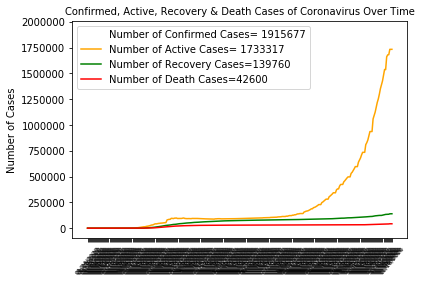

In [39]:
#Coronavirus Active/Confirmed/Recoveries/Deaths Cases Over Time
plt.plot(adjusted_dates, france_cases, color='white')
plt.plot(adjusted_dates, active_cases, color='orange')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Confirmed, Active, Recovery & Death Cases of Coronavirus Over Time', size=10)
plt.legend(['Number of Confirmed Cases= '+ str(confirmed_sum), 'Number of Active Cases= '+ str(active_cases_sum), 'Number of Recovery Cases='+ str(recovered_sum), 'Number of Death Cases='+ str(death_sum)], loc='upper left', fontsize=10)
plt.ylabel('Number of Cases', size=10)
plt.xticks(rotation=50, size=6)
plt.show()

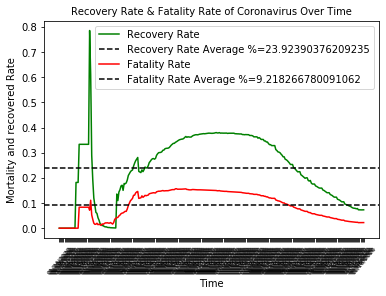

In [37]:
###Coronavirus Recovery & Mortality Rate Over Time
mean_recovery_rate = np.mean(recovery_rate)
mean_mortality_rate = np.mean(mortality_rate)
plt.plot(adjusted_dates, recovery_rate, color='green')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.plot(adjusted_dates, mortality_rate, color='red')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Recovery Rate & Fatality Rate of Coronavirus Over Time', size=10)
plt.legend(['Recovery Rate', 'Recovery Rate Average %='+str(mean_recovery_rate*100),'Fatality Rate', 'Fatality Rate Average %='+str(mean_mortality_rate*100)], loc='upper right', fontsize=10)
plt.xlabel('Time')
plt.ylabel('Mortality and recovered Rate')
plt.xticks(rotation=50, size=6)
plt.show()

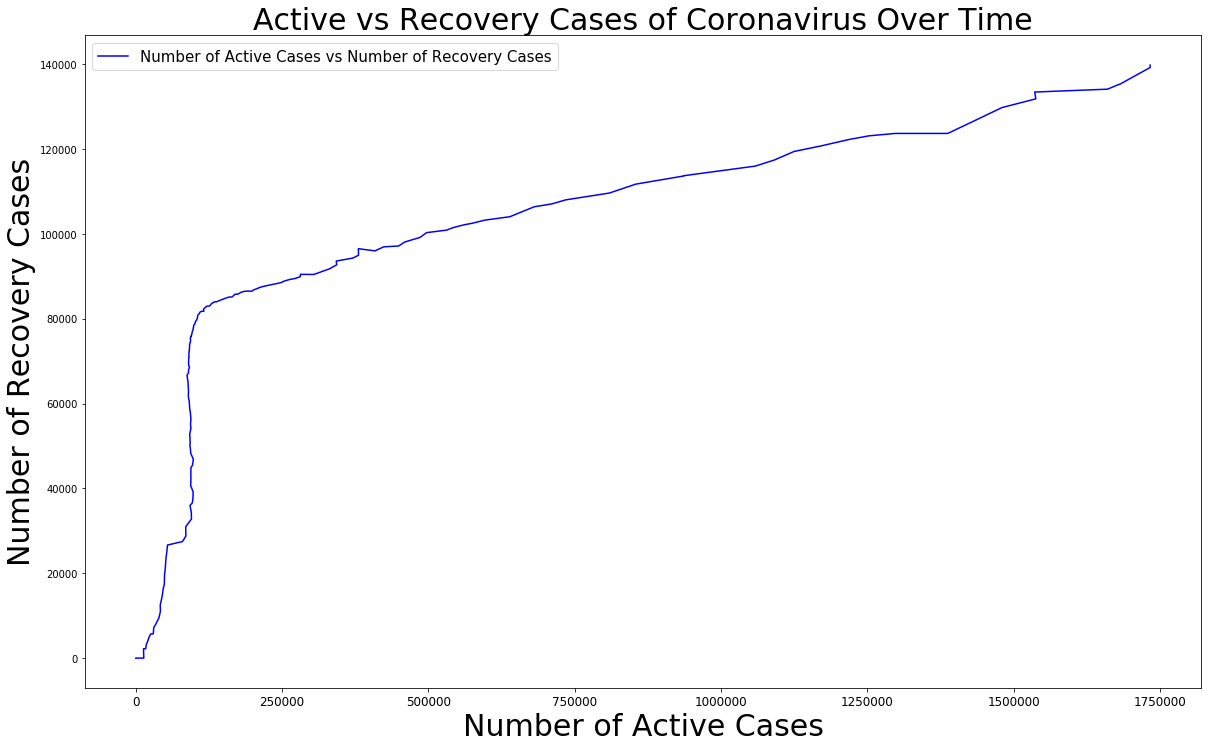

In [30]:
##Active vs recovered Cases Cases
plt.figure(figsize=(20, 12))
plt.plot(active_cases, total_recovered, color='blue')
plt.title('Active vs Recovery Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Active Cases vs Number of Recovery Cases'], loc='upper left', fontsize=15)
plt.xlabel('Number of Active Cases', size=30)
plt.ylabel('Number of Recovery Cases', size=30)
plt.xticks(size=12)
plt.show()